In [2]:
import matplotlib.pyplot as plt
import numpy as np

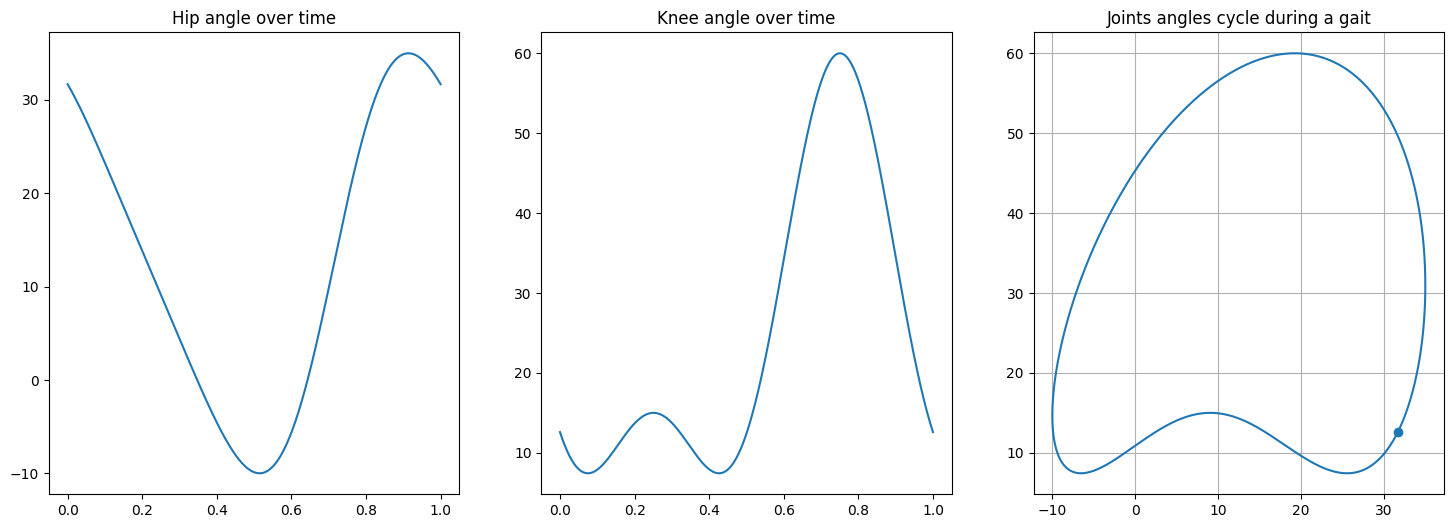

In [3]:
_, axs = plt.subplots(1, 3, figsize=(18, 6))

size = 1000

# empirically created

phase = -0.475

t = np.linspace(0, 1, size)
t_ = 2*np.pi*t

#hip angle approx
hp = 0.7 #hip phase
c1 = lambda t: 22.5*np.cos(t+(np.cos(t)/3))
alpha_h = c1(t_+hp+phase) + 12.5
axs[0].plot(t, alpha_h)
axs[0].set_title("Hip angle over time")

#knee angle approx
kp = -1.1 #knee phase
c2 = lambda t: -22.5*np.cos(t)
c3 = lambda t: 12.5*np.cos(2*t)
alpha_k = c2(t_+kp+phase) + c3(t_+kp+phase) + 25
axs[1].plot(t, alpha_k)
axs[1].set_title("Knee angle over time")

axs[2].plot(alpha_h, alpha_k)
axs[2].scatter(alpha_h[0], alpha_k[0]) #start point
axs[2].set_title("Joints angles cycle during a gait")
axs[2].grid()
plt.show()
plt.close()

# close enough to https://pub.mdpi-res.com/sensors/sensors-21-07685/article_deploy/html/images/sensors-21-07685-g002.png?1637305091
# and https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPIbGA6ZgjI3UEcKaEohwl6q8cmuFVOewOgCZ2ly5P&s

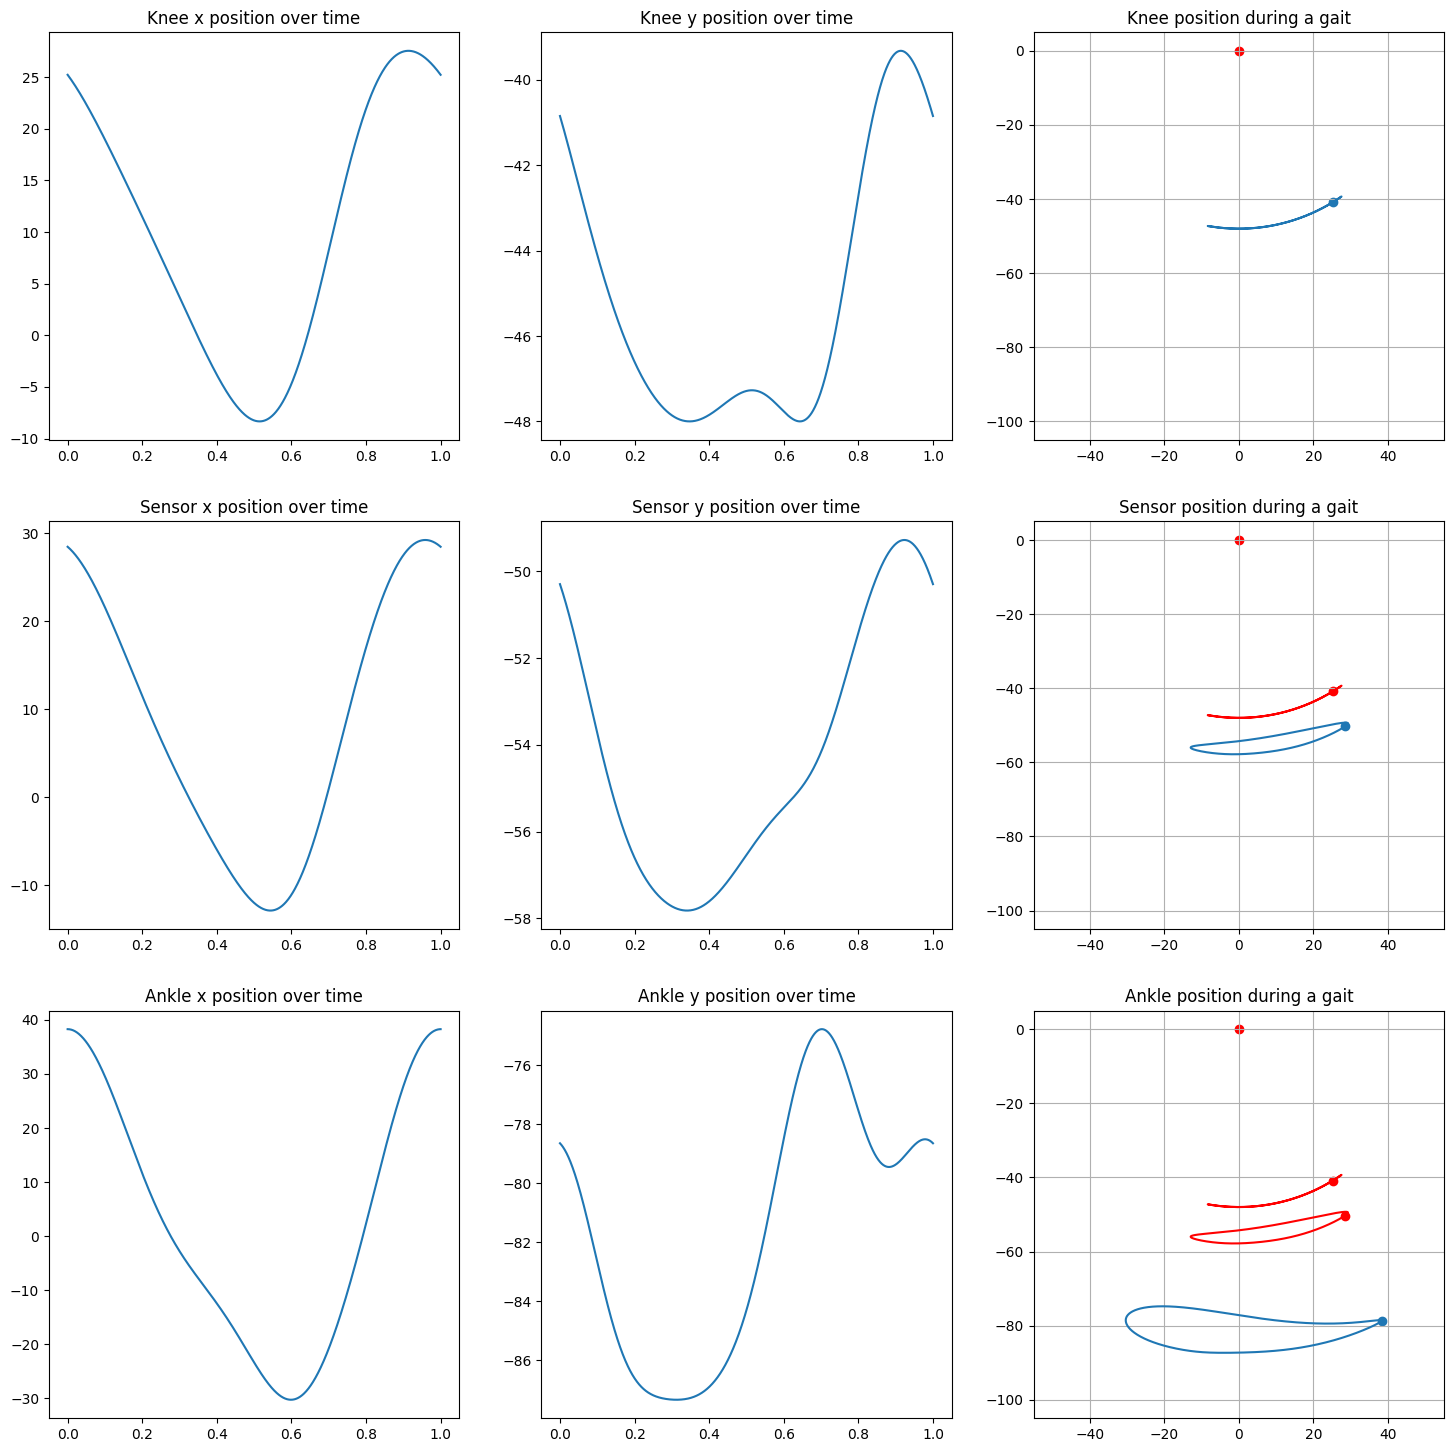

In [4]:
_, axs = plt.subplots(3, 3, figsize=(18, 18))

femur = 48 #male femur average length (cm)
#knee position over x
x_knee = femur * np.sin(2*np.pi*alpha_h/360)
axs[0][0].plot(t, x_knee)
axs[0][0].set_title("Knee x position over time")

#knee position over y
y_knee = - femur * np.cos(2*np.pi*alpha_h/360)
axs[0][1].plot(t, y_knee)
axs[0][1].set_title("Knee y position over time")

#knee position cycle
axs[0][2].plot(x_knee, y_knee)
axs[0][2].scatter(x_knee[0], y_knee[0]) #start point
axs[0][2].scatter(0, 0, color="r") #hip
axs[0][2].set_title("Knee position during a gait")
axs[0][2].set_xlim(-55, 55)
axs[0][2].set_ylim(-105, 5)
axs[0][2].grid()

#assuming sensor is ~ 10cm to the knee
sensor = 10
#sensor position over x
x_sensor = x_knee + sensor * np.sin(2*np.pi*(alpha_h-alpha_k)/360)
axs[1][0].plot(t, x_sensor)
axs[1][0].set_title("Sensor x position over time")

#sensor position over y
y_sensor = y_knee - sensor * np.cos(2*np.pi*(alpha_h-alpha_k)/360)
axs[1][1].plot(t, y_sensor)
axs[1][1].set_title("Sensor y position over time")

#sensor position cycle
axs[1][2].plot(x_sensor, y_sensor)
axs[1][2].scatter(x_sensor[0], y_sensor[0]) #start point
axs[1][2].scatter(0, 0, color="r") #hip
axs[1][2].plot(x_knee, y_knee, color="r")
axs[1][2].scatter(x_knee[0], y_knee[0], color="r") #start point
axs[1][2].set_title("Sensor position during a gait")
axs[1][2].set_xlim(-55, 55)
axs[1][2].set_ylim(-105, 5)
axs[1][2].grid()

#full leg
tibia = 40
#ankle position over x
x_ankle = x_knee + tibia * np.sin(2*np.pi*(alpha_h-alpha_k)/360)
axs[2][0].plot(t, x_ankle)
axs[2][0].set_title("Ankle x position over time")

#ankle position over y
y_ankle = y_knee - tibia * np.cos(2*np.pi*(alpha_h-alpha_k)/360)
axs[2][1].plot(t, y_ankle)
axs[2][1].set_title("Ankle y position over time")

#ankle position cycle
axs[2][2].plot(x_ankle, y_ankle)
axs[2][2].scatter(x_ankle[0], y_ankle[0]) #start point
axs[2][2].scatter(0, 0, color="r") #hip
axs[2][2].plot(x_knee, y_knee, color="r")
axs[2][2].scatter(x_knee[0], y_knee[0], color="r") #start point
axs[2][2].plot(x_sensor, y_sensor, color="r")
axs[2][2].scatter(x_sensor[0], y_sensor[0], color="r") #start point
axs[2][2].set_title("Ankle position during a gait")
axs[2][2].set_xlim(-55, 55)
axs[2][2].set_ylim(-105, 5)
axs[2][2].grid()

plt.show()

plt.show()

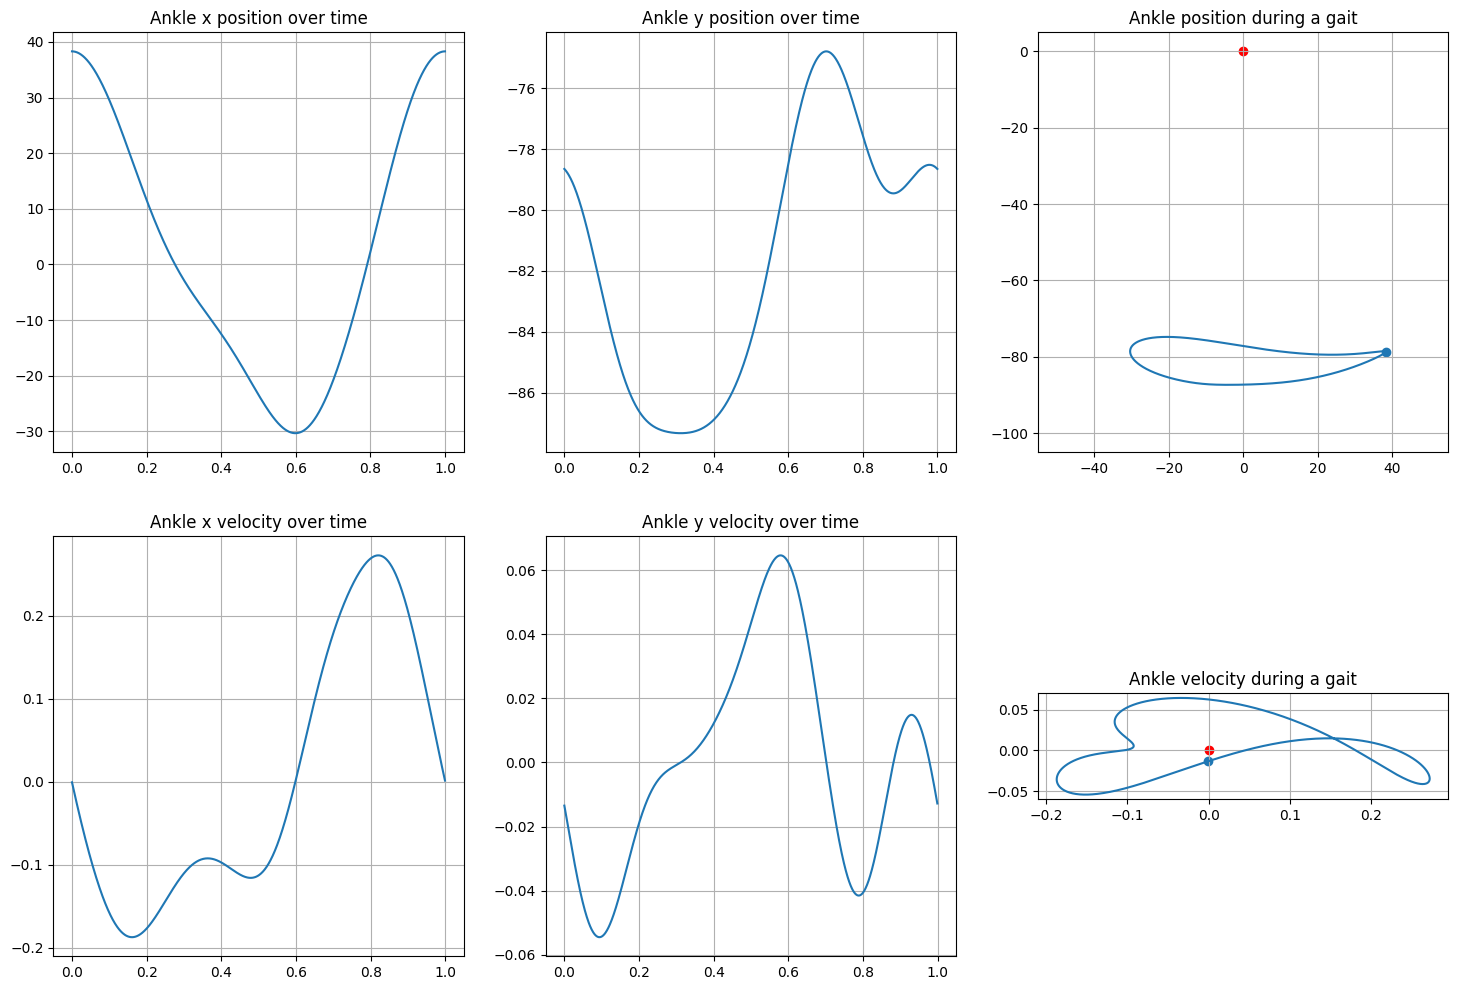

In [5]:
_, axs = plt.subplots(2, 3, figsize=(18, 12))

#ankle position over x
axs[0][0].plot(t, x_ankle)
axs[0][0].set_title("Ankle x position over time")
axs[0][0].grid()

#ankle position over y
axs[0][1].plot(t, y_ankle)
axs[0][1].set_title("Ankle y position over time")
axs[0][1].grid()

#ankle position cycle
axs[0][2].plot(x_ankle, y_ankle)
axs[0][2].scatter(x_ankle[0], y_ankle[0]) #start point
axs[0][2].scatter(0, 0, color="r") #hip
axs[0][2].set_title("Ankle position during a gait")
axs[0][2].set_xlim(-55, 55)
axs[0][2].set_ylim(-105, 5)
axs[0][2].grid()

#ankle velocity over x
vx_ankle = np.diff(x_ankle)
axs[1][0].plot(t[:-1], vx_ankle)
axs[1][0].set_title("Ankle x velocity over time")
axs[1][0].grid()

#ankle velocity over y
vy_ankle = np.diff(y_ankle)
axs[1][1].plot(t[:-1], vy_ankle)
axs[1][1].set_title("Ankle y velocity over time")
axs[1][1].grid()

#ankle velocity cycle
axs[1][2].plot(vx_ankle, vy_ankle)
axs[1][2].scatter(vx_ankle[0], vy_ankle[0]) #start point
axs[1][2].scatter(0, 0, color="r")
axs[1][2].set_title("Ankle velocity during a gait")
axs[1][2].set_aspect('equal')
axs[1][2].grid()

plt.show()

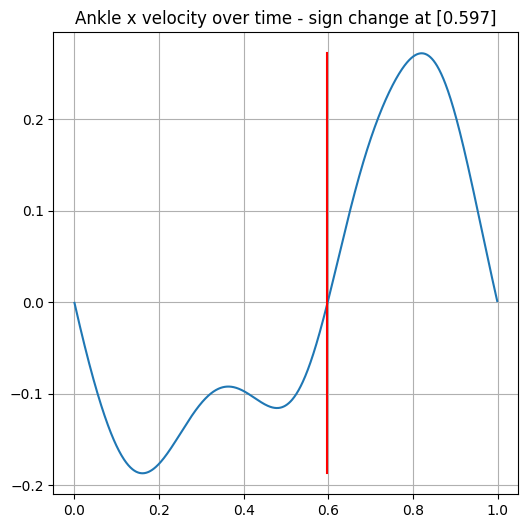

In [6]:
#Assume forward when ankle velocity over x negative
_, axs = plt.subplots(1, 1, figsize=(6, 6))

#ankle velocity over x
axs.plot(t[:-1], vx_ankle)
#velocity sign change
changes = np.array(np.where(((np.diff(np.sign(vx_ankle)) != 0)*1)==1))/size
axs.plot([changes[0], changes[0]], [min(vx_ankle), max(vx_ankle)], "r")
axs.set_title(f"Ankle x velocity over time - sign change at {changes[0]}")
axs.grid()

plt.show()

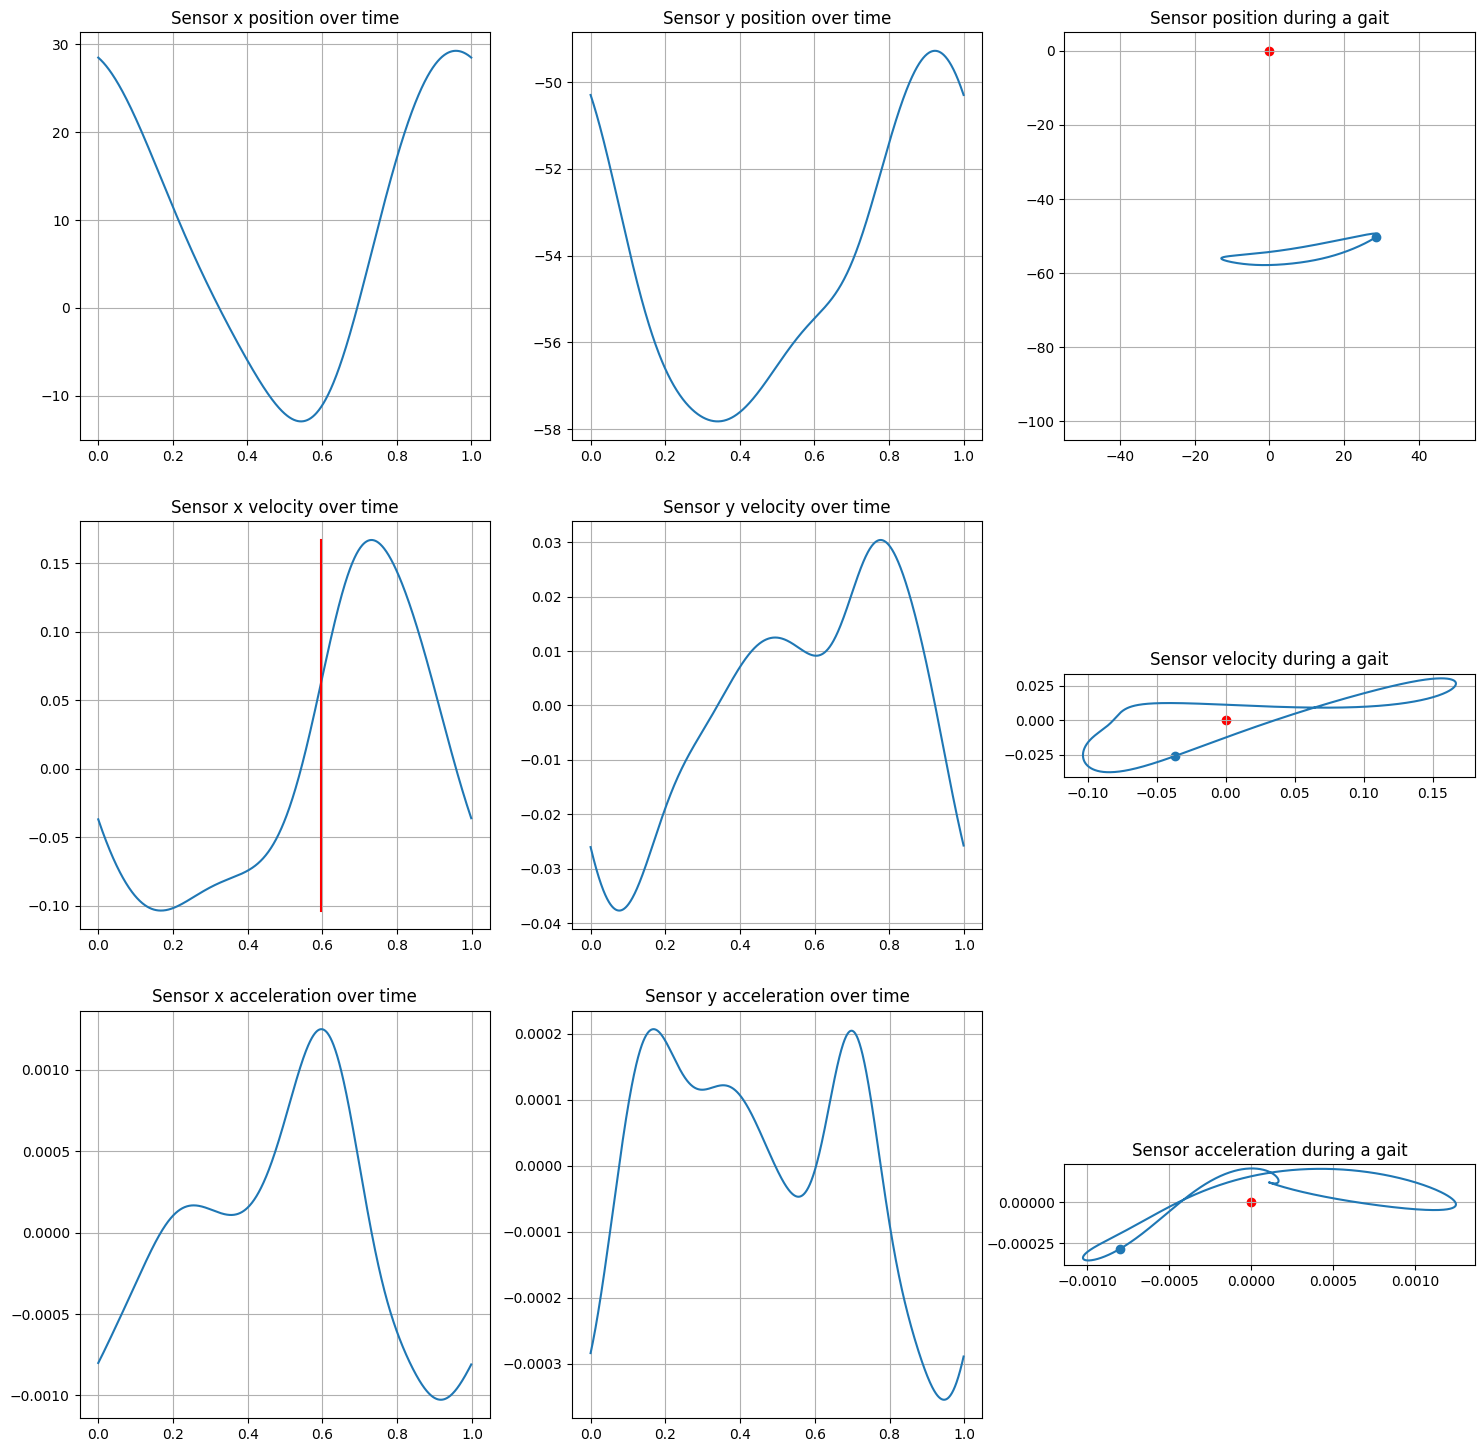

In [7]:
_, axs = plt.subplots(3, 3, figsize=(18, 18))

#sensor position over x
axs[0][0].plot(t, x_sensor)
axs[0][0].set_title("Sensor x position over time")
axs[0][0].grid()

#sensor position over y
axs[0][1].plot(t, y_sensor)
axs[0][1].set_title("Sensor y position over time")
axs[0][1].grid()

#sensor position cycle
axs[0][2].plot(x_sensor, y_sensor)
axs[0][2].scatter(x_sensor[0], y_sensor[0]) #start point
axs[0][2].scatter(0, 0, color="r") #hip
axs[0][2].set_title("Sensor position during a gait")
axs[0][2].set_xlim(-55, 55)
axs[0][2].set_ylim(-105, 5)
axs[0][2].grid()

#sensor velocity over x
vx_sensor = np.diff(x_sensor)
axs[1][0].plot(t[:-1], vx_sensor)
axs[1][0].plot([changes[0], changes[0]], [min(vx_sensor), max(vx_sensor)], "r")
axs[1][0].set_title("Sensor x velocity over time")
axs[1][0].grid()

#sensor velocity over y
vy_sensor = np.diff(y_sensor)
axs[1][1].plot(t[:-1], vy_sensor)
axs[1][1].set_title("Sensor y velocity over time")
axs[1][1].grid()

#sensor velocity cycle
axs[1][2].plot(vx_sensor, vy_sensor)
axs[1][2].scatter(vx_sensor[0], vy_sensor[0]) #start point
axs[1][2].scatter(0, 0, color="r")
axs[1][2].set_title("Sensor velocity during a gait")
axs[1][2].set_aspect('equal')
axs[1][2].grid()

#sensor acceleration over x
ax_sensor = np.diff(vx_sensor)
axs[2][0].plot(t[:-2], ax_sensor)
axs[1][0].plot([changes[0], changes[0]], [min(ax_sensor), max(ax_sensor)], "r")
axs[2][0].set_title("Sensor x acceleration over time")
axs[2][0].grid()

#sensor acceleration over y
ay_sensor = np.diff(vy_sensor)
axs[2][1].plot(t[:-2], ay_sensor)
axs[2][1].set_title("Sensor y acceleration over time")
axs[2][1].grid()

#sensor acceleration cycle
axs[2][2].plot(ax_sensor, ay_sensor)
axs[2][2].scatter(ax_sensor[0], ay_sensor[0]) #start point
axs[2][2].scatter(0, 0, color="r")
axs[2][2].set_title("Sensor acceleration during a gait")
axs[2][2].set_aspect('equal')
axs[2][2].grid()

plt.show()

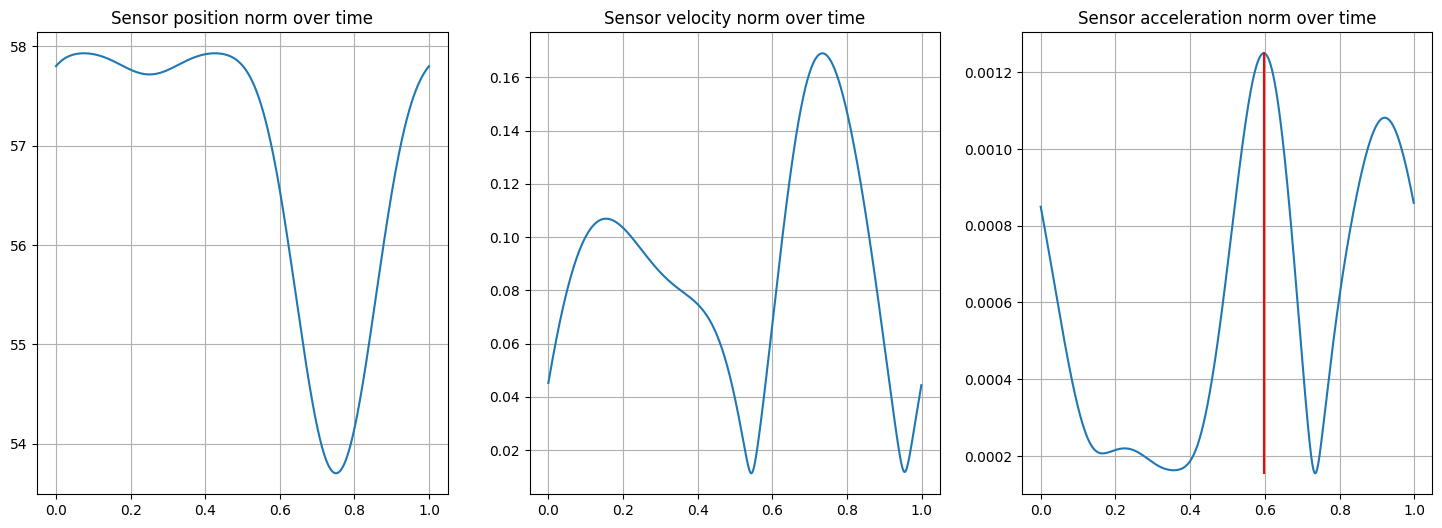

In [8]:
_, axs = plt.subplots(1, 3, figsize=(18, 6))

#sensor position norm
n_sensor = np.sqrt(np.power(x_sensor, 2) + np.power(y_sensor, 2))
axs[0].plot(t, n_sensor)
axs[0].set_title("Sensor position norm over time")
axs[0].grid()

#sensor velocity norm
nv_sensor = np.sqrt(np.power(vx_sensor, 2) + np.power(vy_sensor, 2))
axs[1].plot(t[:-1], nv_sensor)
axs[1].set_title("Sensor velocity norm over time")
axs[1].grid()

#sensor acceleration norm
na_sensor = np.sqrt(np.power(ax_sensor, 2) + np.power(ay_sensor, 2))
axs[2].plot(t[:-2], na_sensor)
axs[2].plot([changes[0], changes[0]], [min(na_sensor), max(na_sensor)], "r")
axs[2].set_title("Sensor acceleration norm over time")
axs[2].grid()

plt.show()